# Student Academic Performance Analysis

In [2]:
# Imports and Settings
import warnings
warnings.filterwarnings('ignore')  # suppress warnings to keep output clean

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # ensuring non-interactive backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # switching backend if only plt is imported

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Setting Seaborn style for aesthetics
sns.set(style='whitegrid')

print("Imports and settings complete")

Imports and settings complete


In [3]:
# Data Loading
import os

data_file = 'SAP-4000.csv'

if not os.path.exists(data_file):
    raise FileNotFoundError(f"The data file {data_file} was not found. Make sure the file is in the same directory as this notebook.")

# Reading the CSV file using UTF-8-SIG encoding as specified
df = pd.read_csv(data_file, encoding='UTF-8-SIG')

print(f'Data loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.')

Data loaded successfully with 4000 rows and 7 columns.


## Data Cleaning and Preprocessing

In this section, we clean up the data and make sure it is ready for our analysis. Sometimes the data can be messy, and as any data scientist will tell you, cleaning is 80% of the work. (At least that's what we tell ourselves.)

In [4]:
# Data Cleaning and Preprocessing

# Display first few rows to inspect the data
print('First 5 rows of the dataset:')
print(df.head())

# Checking for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Removing leading/trailing spaces in object columns if any
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col] = df[col].str.strip()

# Convert column names if needed (e.g., remove special characters) - Here, keeping as is but replacing '/' with '_' in column names
df.columns = [c.replace('/', '_') for c in df.columns]

print('\nColumns after cleaning:')
print(df.columns.tolist())

First 5 rows of the dataset:
   Gender  HoursStudied/Week Tutoring Region  Attendance(%) Parent Education  \
0    Male                5.5       No  Urban           72.7         Tertiary   
1  Female                6.8       No  Urban           62.0          Primary   
2  Female                9.7       No  Rural           95.0        Secondary   
3    Male               13.3      Yes  Rural           52.9              NaN   
4  Female                8.9       No  Urban           50.8              NaN   

   Exam_Score  
0        43.5  
1        51.7  
2        70.1  
3        79.5  
4        52.2  

Missing values in each column:
Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64

Columns after cleaning:
['Gender', 'HoursStudied_Week', 'Tutoring', 'Region', 'Attendance(%)', 'Parent Education', 'Exam_Score']


In [5]:
df['Parent Education'].unique()

array(['Tertiary', 'Primary', 'Secondary', nan], dtype=object)

## Predictive Modeling

It's time to see if we can predict student exam scores from the available features. We will use a simple linear regression model. In our predictor, we make use of the numeric variables and one-hot encode categorical variables. The model performance will be estimated using the R² score and RMSE. The predictor might not be a champion in every contest, but it's a good starting point.

R2 Score: 0.92
RMSE: 4.98


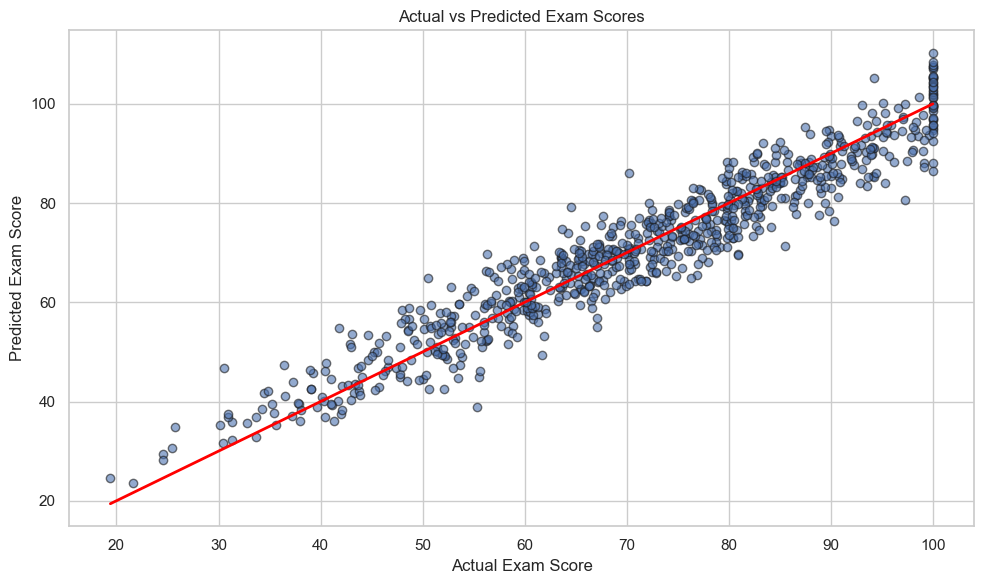

In [6]:
# Predictive Modeling

# Prepare dataset for regression
df_model = df.copy()

# One-hot encode categorical features
categorical_cols = ['Gender', 'Tutoring', 'Region', 'Parent Education']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Define feature columns and target variable
target = 'Exam_Score'
features = [col for col in df_model.columns if col != target]

X = df_model[features]
y = df_model[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R2 score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Save the trained model
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # identity line
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()